In [8]:
#tools for imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#api and endpoints from nbaapi.stats: team & player ids
from nba_api.stats.static import players
from nba_api.stats.static import teams

##api and endpoints from nbaapi.stats: shot chart specifics
from nba_api.stats.endpoints import ShotChartDetail
from nba_api.stats.endpoints import ShotChartLineupDetail
from nba_api.stats.endpoints import ShotChartLeagueWide

from nba_api.stats.endpoints import LeagueDashPlayerPtShot

from nba_api.stats.endpoints import PlayerDashPtShots

In [2]:
#finding a players id:
players.find_players_by_first_name('Keldon')

[{'id': 1629640,
  'full_name': 'Keldon Johnson',
  'first_name': 'Keldon',
  'last_name': 'Johnson',
  'is_active': True}]

In [3]:
#finding a teams id by full name:
teams.find_teams_by_full_name('spurs')

[{'id': 1610612759,
  'full_name': 'San Antonio Spurs',
  'abbreviation': 'SAS',
  'nickname': 'Spurs',
  'city': 'San Antonio',
  'state': 'Texas',
  'year_founded': 1976}]

In [4]:
#setting up Keldon Johnson's variables:
team_id = 1610612759
player_id = 1629640

In [5]:
#creating a dataframe from shotchartdetails: (with Keldon Johnson's stats)
shotchart_df = ShotChartDetail(team_id, player_id).get_normalized_dict()
df=pd.DataFrame(shotchart_df['Shot_Chart_Detail'])
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900531,676,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,0,59,...,Center(C),Less Than 8 ft.,5,20,50,1,1,20200104,MIL,SAS
1,Shot Chart Detail,0021900734,629,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,1,16,...,Center(C),Less Than 8 ft.,6,54,43,1,1,20200201,SAS,CHA
2,Shot Chart Detail,0021900846,533,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,11,29,...,Center(C),Less Than 8 ft.,1,-18,-2,1,1,20200223,OKC,SAS
3,Shot Chart Detail,0021900846,555,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,9,14,...,Center(C),Less Than 8 ft.,0,0,1,1,1,20200223,OKC,SAS
4,Shot Chart Detail,0021900846,570,1629640,Keldon Johnson,1610612759,San Antonio Spurs,4,8,8,...,Center(C),Less Than 8 ft.,6,65,25,1,1,20200223,OKC,SAS


In [23]:
#looking at columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            862 non-null    object
 1   GAME_ID              862 non-null    object
 2   GAME_EVENT_ID        862 non-null    int64 
 3   PLAYER_ID            862 non-null    int64 
 4   PLAYER_NAME          862 non-null    object
 5   TEAM_ID              862 non-null    int64 
 6   TEAM_NAME            862 non-null    object
 7   PERIOD               862 non-null    int64 
 8   MINUTES_REMAINING    862 non-null    int64 
 9   SECONDS_REMAINING    862 non-null    int64 
 10  EVENT_TYPE           862 non-null    object
 11  ACTION_TYPE          862 non-null    object
 12  SHOT_TYPE            862 non-null    object
 13  SHOT_ZONE_BASIC      862 non-null    object
 14  SHOT_ZONE_AREA       862 non-null    object
 15  SHOT_ZONE_RANGE      862 non-null    object
 16  SHOT_DIS

In [ ]:
#breaking GAME_DATE into seasons by turning into DateTime astype first:


In [24]:
#looking for 3pt shots and name of string:
df.SHOT_TYPE

0      2PT Field Goal
1      2PT Field Goal
2      2PT Field Goal
3      2PT Field Goal
4      2PT Field Goal
            ...      
857    2PT Field Goal
858    2PT Field Goal
859    2PT Field Goal
860    2PT Field Goal
861    3PT Field Goal
Name: SHOT_TYPE, Length: 862, dtype: object

In [30]:
df3pt = df[df.SHOT_TYPE == '3PT Field Goal']

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

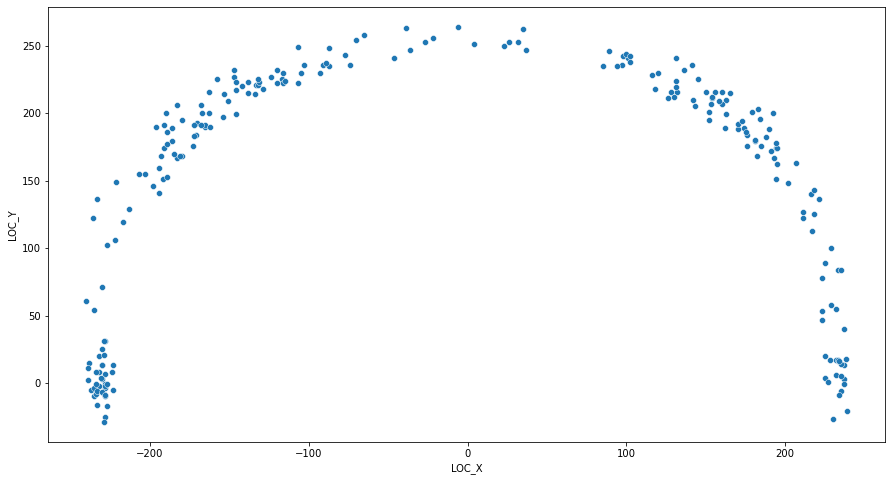

In [33]:
#creating a scatterplot of 3ptshots:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.scatterplot(x= df3pt.LOC_X, y=df3pt.LOC_Y, data=df3pt.SHOT_TYPE == '3PT Field Goal')


In [6]:
#looking to find the 3pt shots that were missed:
print(df['SHOT_MADE_FLAG']== 0)

0      False
1      False
2      False
3      False
4      False
       ...  
857    False
858    False
859    False
860    False
861    False
Name: SHOT_MADE_FLAG, Length: 862, dtype: bool


#### Hmmm....doesn't exist...will have to try another endpoint..